# Project Definition
Part one: analysis and file prep for Deep Neural Network (DNN) for Machine Learning

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt

from sklearn import preprocessing


In [2]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [3]:
# make sure to "$ pip3 install yfinance"
# make sure to "$ pip3 install pandas-datareader"

In [4]:
#!pip3 install yfinance --upgrade --no-cache-dir

In [5]:
#!pip3 install pandas_datareader

# Analysis

In [6]:
import yfinance as yf #python library to scrap data from yahoo finance
from pandas_datareader import data as pdr #extract data from internet sources into pandas data frame

In [7]:
# importing from yahoo finance: S&P 500, Google, Microsoft, and Amazon
# Due to the data storage of the project capabilities, the data's timeline a been restricted to a small time length
data = pdr.get_data_yahoo(["SPY", "GOOG", "MSFT", "AMZN"], start="2015-01-01")
                           

In [8]:
data.head()

Attributes   Adj Close                                          Close  \
Symbols            SPY        GOOG       MSFT        AMZN         SPY   
Date                                                                    
2015-01-02  187.074585  523.373108  41.979183  308.519989  205.429993   
2015-01-05  183.696091  512.463013  41.593143  302.190002  201.720001   
2015-01-06  181.965881  500.585632  40.982681  295.290009  199.820007   
2015-01-07  184.233383  499.727997  41.503380  298.420013  202.309998   
2015-01-08  187.502594  501.303680  42.724323  300.459991  205.899994   

Attributes                                           High              ...  \
Symbols           GOOG       MSFT        AMZN         SPY        GOOG  ...   
Date                                                                   ...   
2015-01-02  523.373108  46.759998  308.519989  206.880005  529.815369  ...   
2015-01-05  512.463013  46.330002  302.190002  204.369995  522.894409  ...   
2015-01-06  500.585632  45.650002  295.290009  202.720001  514.761719  ...   
2015-01-07  499.727997  46.230000  298.420013  202.720001  505.855164  ...   
2015-01-08  501.303680  47.590000  300.459991  206.160004  502.101471  ...   

Attributes        Low                    Open                         \
Symbols          MSFT        AMZN         SPY        GOOG       MSFT   
Date                                                                   
2015-01-02  46.540001  306.959991  206.380005  527.561584  46.660000   
2015-01-05  46.250000  300.850006  204.169998  521.827332  46.369999   
2015-01-06  45.540001  292.380005  202.089996  513.589966  46.380001   
2015-01-07  45.490002  295.329987  201.419998  505.611847  45.980000   
2015-01-08  46.720001  296.109985  204.009995  496.626526  46.750000   

Attributes                   Volume                                    
Symbols           AMZN          SPY       GOOG        MSFT       AMZN  
Date                                                                   
2015-01-02  312.579987  121465900.0  1447500.0  27913900.0  2783200.0  
2015-01-05  307.010010  169632600.0  2059800.0  39673900.0  2774200.0  
2015-01-06  302.239990  209151400.0  2899900.0  36447900.0  3519000.0  
2015-01-07  297.500000  125346700.0  2065000.0  29114100.0  2640300.0  
2015-01-08  300.320007  147217800.0  3353500.0  29645200.0  3088400.0  

[5 rows x 24 columns]

In [9]:
# find any missing null values
data.isnull().sum()

Attributes  Symbols
Adj Close   SPY        0
            GOOG       0
            MSFT       0
            AMZN       0
Close       SPY        0
            GOOG       0
            MSFT       0
            AMZN       0
High        SPY        0
            GOOG       0
            MSFT       0
            AMZN       0
Low         SPY        0
            GOOG       0
            MSFT       0
            AMZN       0
Open        SPY        0
            GOOG       0
            MSFT       0
            AMZN       0
Volume      SPY        0
            GOOG       0
            MSFT       0
            AMZN       0
dtype: int64

In [10]:
# describe the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1240 entries, 2015-01-02 to 2019-12-04
Data columns (total 24 columns):
(Adj Close, SPY)     1240 non-null float64
(Adj Close, GOOG)    1240 non-null float64
(Adj Close, MSFT)    1240 non-null float64
(Adj Close, AMZN)    1240 non-null float64
(Close, SPY)         1240 non-null float64
(Close, GOOG)        1240 non-null float64
(Close, MSFT)        1240 non-null float64
(Close, AMZN)        1240 non-null float64
(High, SPY)          1240 non-null float64
(High, GOOG)         1240 non-null float64
(High, MSFT)         1240 non-null float64
(High, AMZN)         1240 non-null float64
(Low, SPY)           1240 non-null float64
(Low, GOOG)          1240 non-null float64
(Low, MSFT)          1240 non-null float64
(Low, AMZN)          1240 non-null float64
(Open, SPY)          1240 non-null float64
(Open, GOOG)         1240 non-null float64
(Open, MSFT)         1240 non-null float64
(Open, AMZN)         1240 non-null float64
(Volume, SPY)  

In [11]:
# focus the project on Adjusted Close
# Adjusted close is the closing price after adjustments for all applicable splits and dividend distributions.
data1= pd.DataFrame(data['Adj Close'])
data1.head()

Symbols,SPY,GOOG,MSFT,AMZN
Date,,,,
2015-01-02,187.074585,523.373108,41.979183,308.519989
2015-01-05,183.696091,512.463013,41.593143,302.190002
2015-01-06,181.965881,500.585632,40.982681,295.290009
2015-01-07,184.233383,499.727997,41.503380,298.420013
2015-01-08,187.502594,501.303680,42.724323,300.459991


In [12]:
data1.describe().round(3)

Symbols,SPY,GOOG,MSFT,AMZN
count,1240.000,1240.000,1240.000,1240.000
mean,234.048,907.317,77.196,1105.275
std,39.558,226.649,32.118,529.484
min,169.957,491.201,36.269,286.950
25%,193.642,728.238,49.283,663.442
50%,232.286,927.230,67.158,965.025
75%,269.258,1107.555,103.763,1663.705
max,315.480,1334.870,152.320,2039.510


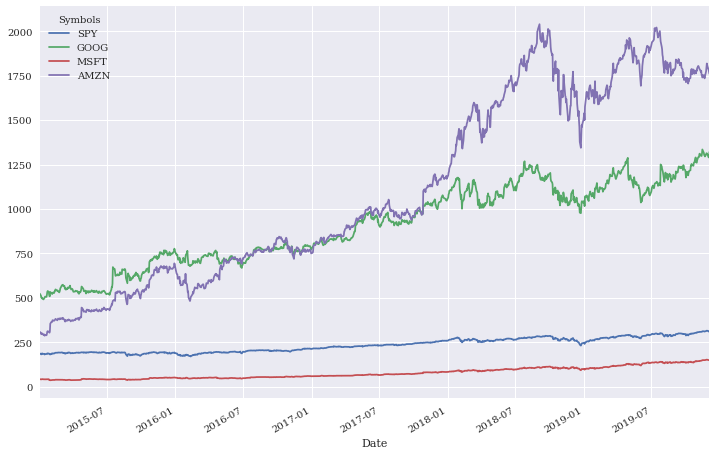

In [13]:
data1.plot(figsize=(12, 8));

In [14]:
# we need to normalize all the stocks to compare changes to each other.
# it should be noted there are other methods to normalize

rets = np.log(data1 / data1.shift(1))

rets.head().round(3)



Symbols,SPY,GOOG,MSFT,AMZN
Date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,-0.018,-0.021,-0.009,-0.021
2015-01-06,-0.009,-0.023,-0.015,-0.023
2015-01-07,0.012,-0.002,0.013,0.011
2015-01-08,0.018,0.003,0.029,0.007


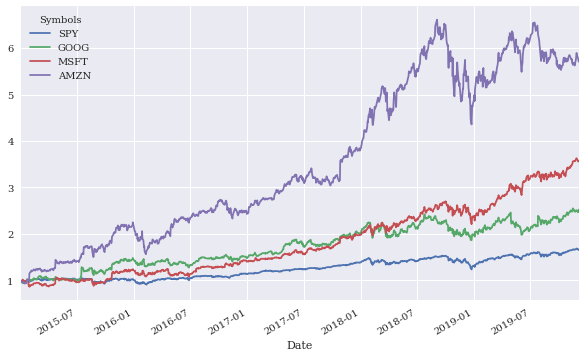

In [15]:
# normalize each stock to each other to find the difference and change between each one
rets.cumsum().apply(np.exp).plot(figsize=(10,6));

When normalized, Microsoft is in a very similar range to the stocks of S&P 500, and Google.

In [36]:
# Any stock can be picked
# SPY was picked since it is dynamic enough to show the following part of the project

symbol = "SPY"

data_single = pd.DataFrame(data1[symbol]).dropna()

data_single_stat = data_single.copy()
data_single.tail()



,SPY
Date,
2019-11-27,315.480011
2019-11-29,314.309998
2019-12-02,311.640015
2019-12-03,309.549988
2019-12-04,311.459991


# Methodology

Indicators of the stock will be analyzed. The data will be generalized with **key indicators of position, returns, and strategy**.  These three will play an integral role in the making of DNN machine learning models for part two.

It is financial tradition to work with rolling statistics and serve as indicators for anaylists and traders:

In [37]:
# A simple moving average (SMA) is an arithmetic moving average calculated by adding recent closing prices and 
# then dividing that by the number of time periods in the calculation average. 
 
#SMA1 is the number of about 2 trading months (about 21 days of trading in a month)
SMA1 = 42 

#SMA2 is the number of trading days in a year
SMA2 = 252

In [38]:
# window is the number of index values to include, I use SMA1
# calcuates the rolling min
data_single_stat['min'] = data_single[symbol].rolling(window=SMA1).min()

# calcuates the rolling mean
data_single_stat['mean'] = data_single[symbol].rolling(window=SMA1).mean()

# calcuates the rolling standard deviation
data_single_stat['std'] = data_single[symbol].rolling(window=SMA1).std()

# calcuates the rolling median
data_single['median'] = data_single[symbol].rolling(window=SMA1).median()

# calcuates the rolling max
data_single_stat['max'] = data_single[symbol].rolling(window=SMA1).max()

# calculates the exponentially weighted moving average
data_single_stat['ewma'] = data_single[symbol].ewm(halflife=0.5, min_periods=SMA1).mean()

In [39]:
data_single_stat.tail()

,SPY,min,mean,std,max,ewma
Date,,,,,,
2019-11-27,315.480011,288.059998,302.981189,7.617855,315.480011,315.046043
2019-11-29,314.309998,288.059998,303.482856,7.654396,315.480011,314.494009
2019-12-02,311.640015,288.529999,304.044285,7.354470,315.480011,312.353513
2019-12-03,309.549988,288.529999,304.499760,7.077267,315.480011,310.250869
2019-12-04,311.459991,288.529999,304.907141,6.970413,315.480011,311.157711


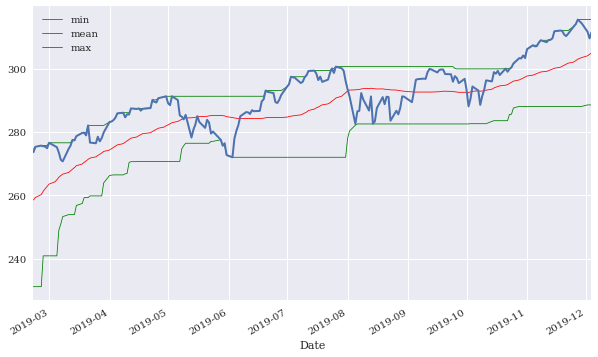

In [40]:
# plots three rolling stats for the final 200 data rows
ax = data_single_stat[['min', 'mean', 'max']].iloc[-200:].plot(
    figsize=(10,6), style=['g', 'r', 'g'], linewidth=0.8)
# plots original data to plot
data_single[symbol].iloc[-200:].plot(ax=ax, linewidth=2.0);

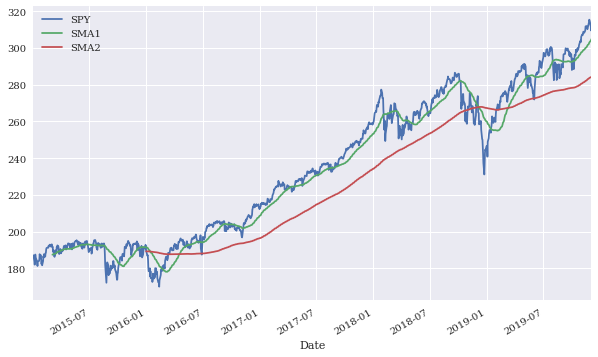

In [41]:
# lets compare the two moving averages to each other
data_single['SMA1'] = data_single[symbol].rolling(window=SMA1).mean()

data_single['SMA2'] = data_single[symbol].rolling(window=SMA2).mean()

# plot them both together

data_single[[symbol, 'SMA1', "SMA2"]].plot(figsize=(10,6));

In [42]:
data_single.dropna(inplace=True)

## Position

The position indicates that the SMA1 has crossed the SMA2 line.  When the line has been crossed, the trader is in a good position to trade in making a return.  If yes to that crossing of SMA1 to SMA2, a 1 will be recorded, else an -1.

In [43]:
# np.where(cond, a, b) evaluates the condition cond element-wise and places a when true, and b otherwise
data_single['Position'] = np.where(data_single['SMA1'] > data_single['SMA2'], 1, -1)


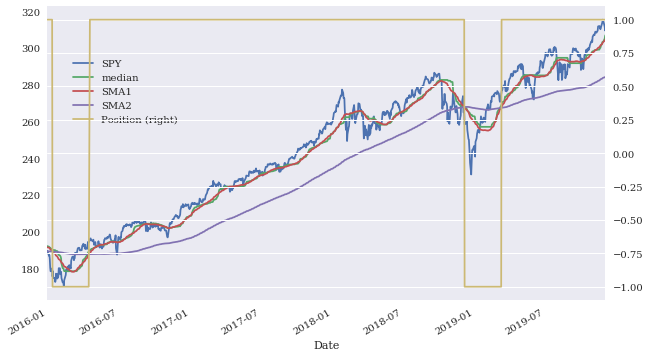

In [44]:
# a brown line is added to illustrate a crossing between the two SMA
ax = data_single.plot(secondary_y='Position', figsize=(10, 6))
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));


## Returns and Strategy

- Returns are the annualized rolling standard deviation of the log returns (or simply volatility)
- Strategy is the log returns of the trading strategy derived the prediction values and the benchmark log returns.

In [45]:
data_single['Returns'] = np.log(data_single[symbol] / data_single[symbol].shift(1)) 
#data['Returns'] = np.log(data[symbol] / data[symbol].shift(1)) 

data_single['Strategy'] = data_single['Position'].shift(1) * data_single['Returns']

In [46]:
data_single.tail(5).round(3)

,SPY,median,SMA1,SMA2,Position,Returns,Strategy
Date,,,,,,,
2019-11-27,315.48,303.315,302.981,283.709,1,0.004,0.004
2019-11-29,314.31,303.735,303.483,283.888,1,-0.004,-0.004
2019-12-02,311.64,305.140,304.044,284.059,1,-0.009,-0.009
2019-12-03,309.55,306.585,304.500,284.215,1,-0.007,-0.007
2019-12-04,311.46,307.065,304.907,284.364,1,0.006,0.006


In [47]:
data_single.isnull()
data_single.dropna(inplace=True)

In [48]:
# sums up log returns for a strategy and the benchmark. Use exponential value to arrive at performance
np.exp(data_single[['Returns', 'Strategy']].sum())

Returns     1.643718
Strategy    1.164699
dtype: float64

In [49]:
# a shift is required to avoid a foresight bias
data_single[['Returns', 'Strategy']].std() * 252 ** 0.5

Returns     0.129865
Strategy    0.130088
dtype: float64

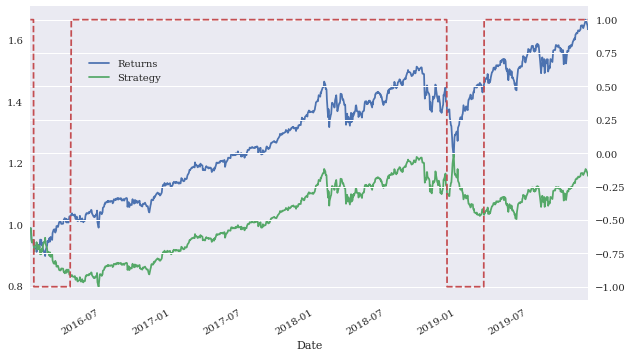

In [50]:
ax = data_single[['Returns', 'Strategy']].cumsum(
        ).apply(np.exp).plot(figsize=(10, 6))
data_single['Position'].plot(ax=ax, secondary_y='Position', style='--')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));

In [51]:
data_single['direction'] = np.sign(data_single['Returns']).astype(int)

In [52]:
data_single

symbol = 'MSFT'
data_ML = data_single.copy()
data_ML.drop(columns = ['median',], inplace=True)

In [53]:
data_ML.head().round(2)

,SPY,SMA1,SMA2,Position,Returns,Strategy,direction
Date,,,,,,,
2016-01-04,186.84,191.24,189.24,1,-0.01,-0.01,-1
2016-01-05,187.15,191.05,189.25,1,0.00,0.00,1
2016-01-06,184.79,190.82,189.26,1,-0.01,-0.01,-1
2016-01-07,180.36,190.49,189.25,1,-0.02,-0.02,-1
2016-01-08,178.38,190.12,189.21,1,-0.01,-0.01,-1


In [55]:
data_ML.to_csv('data_ML', index='Date')

# Next Steps

Part two will be utilizing Position, Returns, and Strategy with three DNN machine learning processes to create a stock predictor